## 1.เขียนโปรแกรมสำหรับสร้างแบบจำลอง logistic regression ด้วยวิธี gradient descent สำหรับแก้ปัญหา logic AND, OR และ XOR (สำหรับปัญหา XOR ต้องใช้ interaction feature)

### ขั้นตอนการสร้างแบบจำลอง Logistic Regression ด้วย Gradient Descent
1. นำเข้าไลบรารีที่จำเป็น
2. เตรียมข้อมูลสำหรับแต่ละปัญหา (AND, OR, XOR)
3. สร้างฟังก์ชัน Sigmoid
4. กำหนดฟังก์ชันการสูญเสีย (Loss Function)
5. กำหนดฟังก์ชัน Gradient Descent
6. ฝึกแบบจำลองและแสดงผลลัพธ์

### 1. นำเข้าไลบรารีที่จำเป็น

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. เตรียมข้อมูล

![AND,OR,XOR Table](https://gcat.davidson.edu/GcatWiki/images/f/ff/Slide3.gif)

In [2]:
# ข้อมูล AND
X_AND = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

Y_AND = np.array([[0],
                  [0],
                  [0],
                  [1]])

# ข้อมูล OR
X_OR = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])

Y_OR = np.array([[0],
                 [1],
                 [1],
                 [1]])

# ข้อมูบ XOR
X_XOR = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 1]])  # x1*x2
y_XOR = np.array([[0],
                  [1],
                  [1],
                  [0]])



### 3. สร้างฟังก์ชัน Sigmoid
ฟังก์ชัน Sigmoid จะช่วยแปลงค่าที่ได้จากการคำนวณเป็นค่าความน่าจะเป็นระหว่าง 0 และ 1

![Sigmoid function](https://miro.medium.com/v2/resize:fit:454/1*qxLxDkPREOt8vvzBdQeAbg.png)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### 4. กำหนดฟังก์ชันการสูญเสีย (Loss Function)
เราใช้ Binary Cross-Entropy Loss สำหรับการทำ Binary Classification

> โดยที่
1. p(yi) คือความน่าจะเป็นของ 1 
2. 1-p(yi) คือความน่าจะเป็นของ 0

![Binary Cross-Entropy Loss](https://arize.com/wp-content/uploads/2022/11/log-loss-1.png)

In [4]:
def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = - (1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    return loss


### 5. กำหนดฟังก์ชัน Gradient Descent

![all function](https://i.sstatic.net/CWnuK.png)

In [5]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    # Initialize weights (n+1 สำหรับ bias)
    weights = np.zeros((n, 1))
    bias = 0
    loss_history = []

    for i in range(iterations):
        # การคำนวณ Z
        Z = np.dot(X, weights) + bias
        # การคำนวณการคาดการณ์
        y_pred = sigmoid(Z)
        # การคำนวณ loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        # การคำนวณ gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        # การปรับค่าพารามิเตอร์
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return weights, bias, loss_history


### 6. ฝึกแบบจำลองและแสดงผลลัพธ์

In [10]:
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [11]:
def train_and_plot(X, y, learning_rate=0.1, iterations=10000, title=""):
    weights, bias, loss_history = gradient_descent(X, y, learning_rate, iterations)
    print("Weights:", weights)
    print("Bias:", bias)

    # การคาดการณ์
    Z = np.dot(X, weights) + bias
    y_pred = sigmoid(Z)
    y_pred_class = (y_pred >= 0.5).astype(int)

    # การพิมพ์ผลลัพธ์
    print("Predictions:\n", y_pred_class)

    # การพล็อต Loss
    plt.plot(loss_history)
    plt.title(f"Loss History {title}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    # การพล็อต Decision Boundary
    if X.shape[1] == 2:  # พล็อตได้เฉพาะเมื่อมี 2 คุณลักษณะ (Features)
        plot_decision_boundary(X, y, weights, bias, title=f"{title} Decision Boundary")


Training Logistic Regression for AND
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.14342116288933154
Iteration 2000: Loss = 0.08162320170600398
Iteration 3000: Loss = 0.05653746130501065
Iteration 4000: Loss = 0.04305831293120699
Iteration 5000: Loss = 0.03468982902727422
Iteration 6000: Loss = 0.02900666954001467
Iteration 7000: Loss = 0.024903015832546962
Iteration 8000: Loss = 0.021804663222207796
Iteration 9000: Loss = 0.01938461520229763
Weights: [[7.41095155]
 [7.41095155]]
Bias: -11.289041399365745
Predictions:
 [[0]
 [0]
 [0]
 [1]]


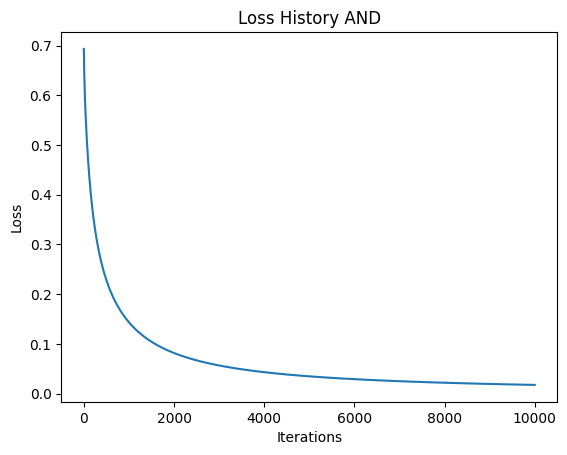

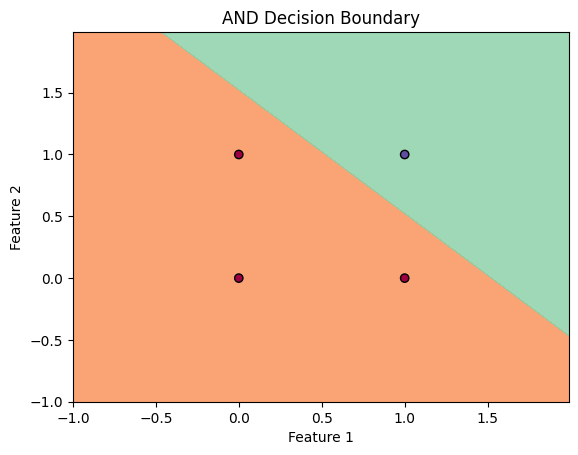

In [12]:
print("Training Logistic Regression for AND")
train_and_plot(X_AND, Y_AND, title="AND")


Training Logistic Regression for OR
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.09003038954892588
Iteration 2000: Loss = 0.04716592056006695
Iteration 3000: Loss = 0.03157555075892506
Iteration 4000: Loss = 0.023632556438329056
Iteration 5000: Loss = 0.01884650165441678
Iteration 6000: Loss = 0.015656428620974255
Iteration 7000: Loss = 0.013381758261814838
Iteration 8000: Loss = 0.011679593511506213
Iteration 9000: Loss = 0.010358815386401186
Weights: [[8.66020366]
 [8.66020366]]
Bias: -3.864938253583503
Predictions:
 [[0]
 [1]
 [1]
 [1]]


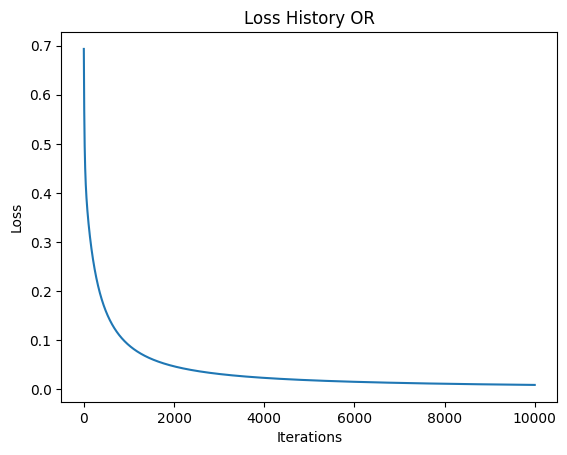

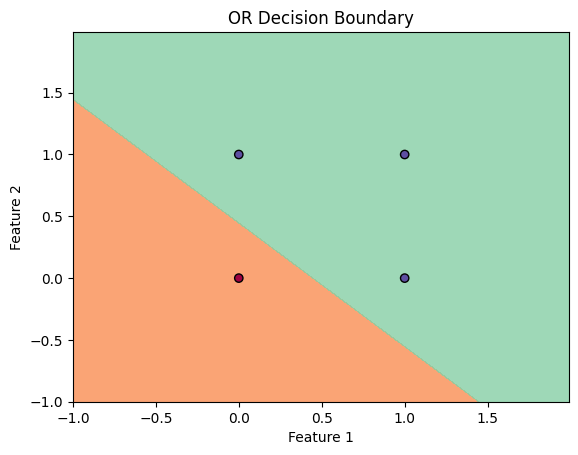

In [13]:
print("Training Logistic Regression for OR")
train_and_plot(X_OR, Y_OR, title="OR")


In [17]:
def plot_decision_boundary_with_interaction(X, y, weights, bias, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    interaction_term = xx * yy  # Interaction term สำหรับการพล็อต
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel(), interaction_term.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



Training Logistic Regression for XOR
Iteration 0: Loss = 0.6931471805599433
Iteration 1000: Loss = 0.23790641877812135
Iteration 2000: Loss = 0.13309834899627213
Iteration 3000: Loss = 0.09033507838416603
Iteration 4000: Loss = 0.06780914570731662
Iteration 5000: Loss = 0.05406879215451048
Iteration 6000: Loss = 0.04486657368766079
Iteration 7000: Loss = 0.03829425310967295
Iteration 8000: Loss = 0.033375202910092716
Iteration 9000: Loss = 0.029560291060259924


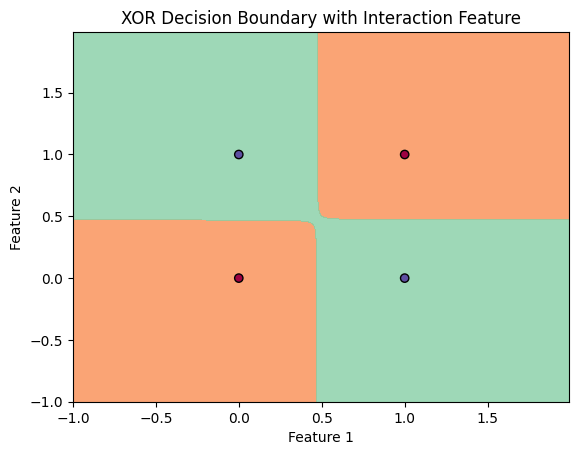

In [19]:
print("Training Logistic Regression for XOR")
weights, bias, loss_history = gradient_descent(X_XOR, y_XOR, learning_rate=0.1, iterations=10000)
plot_decision_boundary_with_interaction(X_XOR, y_XOR, weights, bias, title="XOR Decision Boundary with Interaction Feature")


## 2.ใช้โปรแกรมที่ได้จากข้อ 1 แก้ปัญหาจาก data ที่ generate ขึ้นมา โดยต้องอธิบายด้วยว่า data แต่ละชุด generate ขึ้นมาได้อย่างไร

### ขั้นตอนในการทำการบ้านข้อที่ 2
1. สร้างข้อมูล (Data Generation)
>> - เราจะสร้างข้อมูล 3 ชุดที่มีการกระจายตัวต่างกันเพื่อใช้ในการทดสอบ Logistic Regression ได้แก่:
>> - ข้อมูลที่แยกเชิงเส้นได้ (linearly separable)
>> - ข้อมูลที่ไม่แยกเชิงเส้น (non-linearly separable)
>> - ข้อมูลที่ซับซ้อนมากขึ้น (complex pattern)
2. ใช้ Logistic Regression ที่พัฒนาขึ้นในข้อ 1 กับข้อมูลที่สร้างขึ้น
>> - เราจะฝึก Logistic Regression กับข้อมูลที่สร้างขึ้น และแสดง Decision Boundary เพื่อดูผลลัพธ์ของการจำแนกประเภท

### 1. สร้างข้อมูล

1. ข้อมูลที่แยกเชิงเส้นได้ (Linearly Separable)

> กราฟจะแสดงจุดข้อมูลที่แบ่งแยกกันชัดเจนด้วยเส้นตรง ซึ่ง Logistic Regression สามารถจัดการได้อย่างง่ายดาย

> อธิบาย:

>> - เราสร้างข้อมูล 100 ตัวอย่าง (n_samples=100) ที่มี 2 ฟีเจอร์ (n_features=2).
>> - n_informative=2 หมายถึงทั้ง 2 ฟีเจอร์มีความสำคัญในการจำแนก.
>> - class_sep=2.0 กำหนดความแยกต่างหากระหว่างคลาสให้มากขึ้น ทำให้แยกเชิงเส้นได้ง่าย.

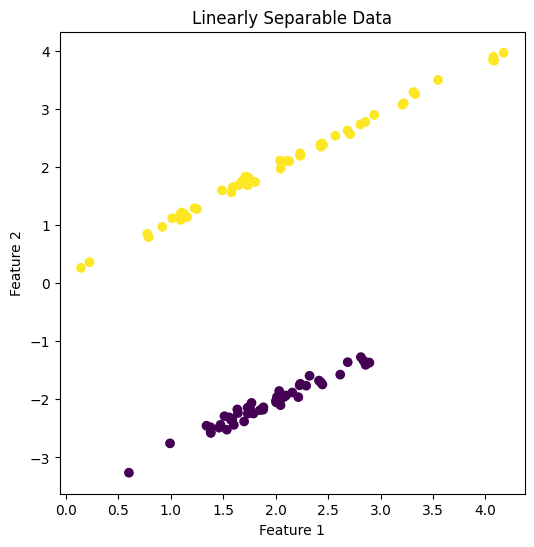

In [22]:
from sklearn.datasets import make_classification

# สร้างข้อมูลที่แยกเชิงเส้นได้
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)
y_linear = y_linear.reshape(-1, 1)  # ปรับรูปร่างให้เป็น (100, 1)

# พล็อตข้อมูล
plt.figure(figsize=(6, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear.ravel())
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

2. ข้อมูลที่ไม่แยกเชิงเส้น (Non-Linearly Separable)

> กราฟจะแสดงจุดข้อมูลที่มีการกระจายเป็นวงกลมสองวงซ้อนกัน ซึ่ง Logistic Regression แบบธรรมดาไม่สามารถจัดการได้อย่างมีประสิทธิภาพ

> อธิบาย:

>> - make_circles สร้างข้อมูลในรูปวงกลม 2 วงที่ซ้อนกัน โดยมี noise (ความไม่แน่นอน) เพิ่มเข้ามา.
>> - factor=0.5 กำหนดขนาดวงกลมภายในเท่ากับครึ่งหนึ่งของวงกลมนอก.

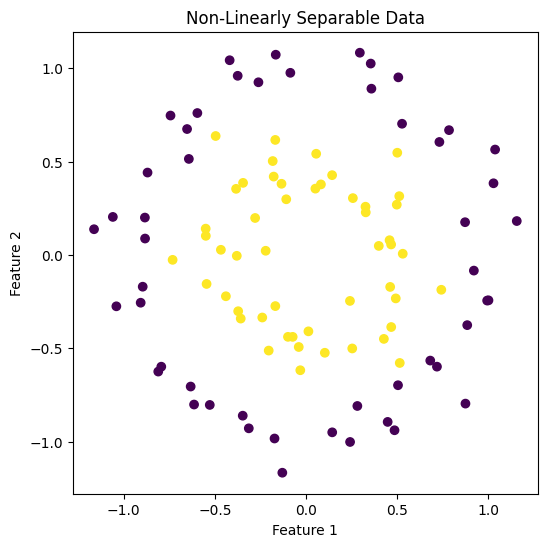

In [25]:
from sklearn.datasets import make_circles

# สร้างข้อมูลที่ไม่แยกเชิงเส้นได้ (ลักษณะวงกลมซ้อนกัน)
X_nonlinear, y_nonlinear = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
y_nonlinear = y_nonlinear.reshape(-1, 1)  # ปรับรูปร่างให้เป็น (100, 1)

# พล็อตข้อมูล
plt.figure(figsize=(6, 6))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear.ravel())
plt.title("Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Complex Pattern Data
> กราฟจะแสดงจุดข้อมูลที่มีการกระจายตัวในรูปแบบสองจุดโค้งคล้ายพระจันทร์ ซึ่งต้องใช้วิธีการจำแนกที่ซับซ้อนขึ้น

> อธิบาย:

>> - make_moons สร้างข้อมูลในรูปของจุดโค้งคล้ายพระจันทร์ 2 จุด.
>> - noise=0.2 เพิ่มความไม่แน่นอนเพื่อให้การจำแนกยากขึ้นเล็กน้อย.

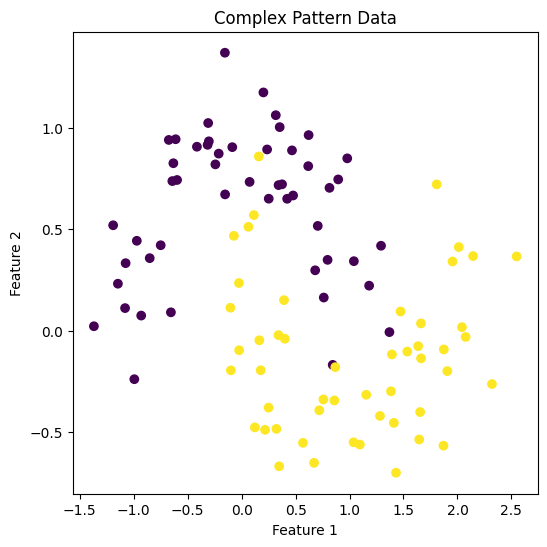

In [24]:
from sklearn.datasets import make_moons

# สร้างข้อมูลลักษณะคล้ายรูปพระจันทร์ (สองจุดโค้ง)
X_complex, y_complex = make_moons(n_samples=100, noise=0.2, random_state=42)
y_complex = y_complex.reshape(-1, 1)  # ปรับรูปร่างให้เป็น (100, 1)

# พล็อตข้อมูล
plt.figure(figsize=(6, 6))
plt.scatter(X_complex[:, 0], X_complex[:, 1], c=y_complex.ravel())
plt.title("Complex Pattern Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Training Logistic Regression on Linearly Separable Data
Iteration 0: Loss = 0.6931471805599436
Iteration 1000: Loss = 0.007734237097722909
Iteration 2000: Loss = 0.00442268594781325
Iteration 3000: Loss = 0.0031475497998592204
Iteration 4000: Loss = 0.0024574140177669687
Iteration 5000: Loss = 0.0020211723557907063
Iteration 6000: Loss = 0.0017192145042744806
Iteration 7000: Loss = 0.0014972658465913424
Iteration 8000: Loss = 0.001326981970864453
Iteration 9000: Loss = 0.0011920612400592502
Weights: [[-0.59658718]
 [ 4.83324521]]
Bias: 1.961306334945215
Predictions:
 [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 

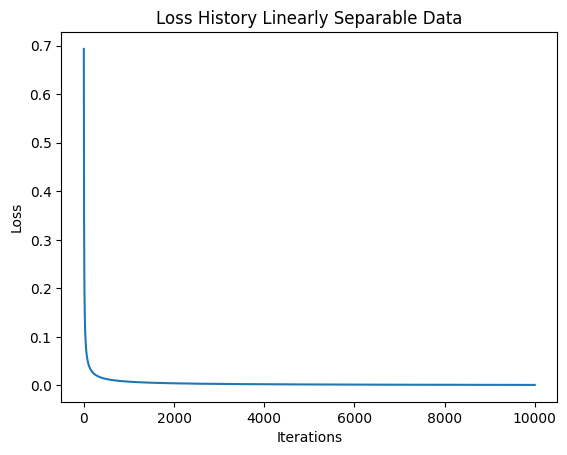

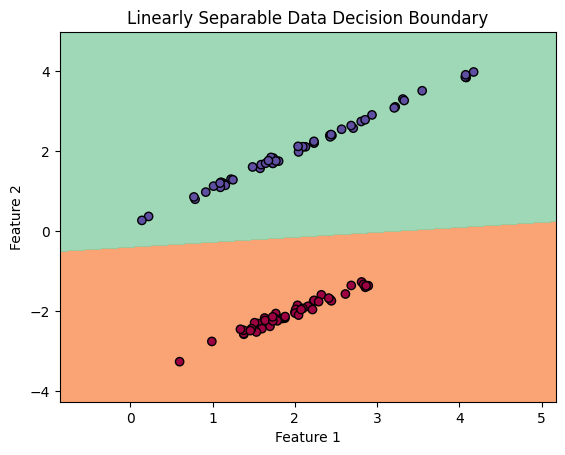

In [26]:
print("Training Logistic Regression on Linearly Separable Data")
train_and_plot(X_linear, y_linear, title="Linearly Separable Data")


Training Logistic Regression on Non-Linearly Separable Data
Iteration 0: Loss = 0.6931471805599436
Iteration 1000: Loss = 0.6930277948794508
Iteration 2000: Loss = 0.6930277948601858
Iteration 3000: Loss = 0.6930277948601855
Iteration 4000: Loss = 0.6930277948601855
Iteration 5000: Loss = 0.6930277948601856
Iteration 6000: Loss = 0.6930277948601856
Iteration 7000: Loss = 0.6930277948601856
Iteration 8000: Loss = 0.6930277948601856
Iteration 9000: Loss = 0.6930277948601856
Weights: [[0.04693029]
 [0.02936471]]
Bias: -0.00010809379555541473
Predictions:
 [[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 

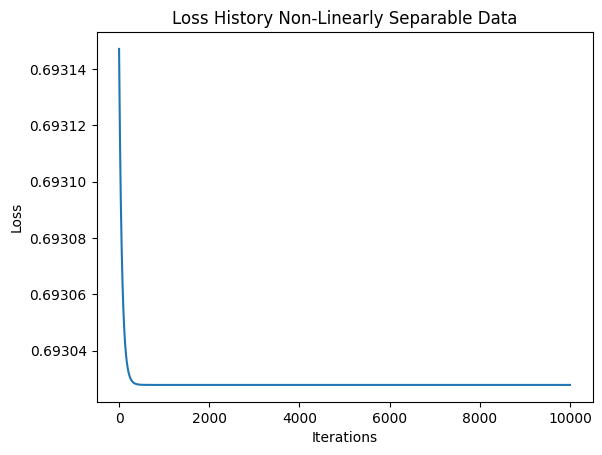

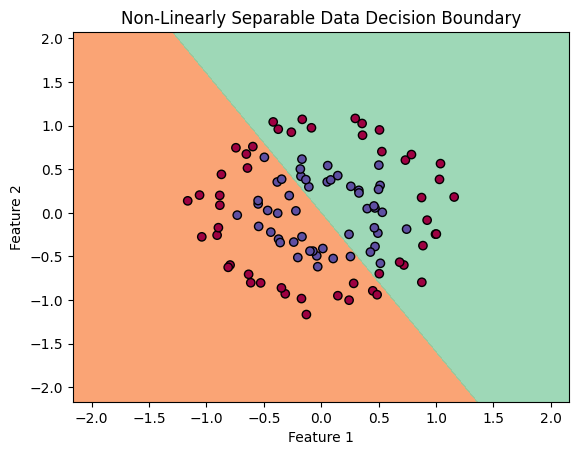

In [27]:
print("Training Logistic Regression on Non-Linearly Separable Data")
train_and_plot(X_nonlinear, y_nonlinear, title="Non-Linearly Separable Data")


Training Logistic Regression on Complex Pattern Data
Iteration 0: Loss = 0.6931471805599436
Iteration 1000: Loss = 0.310409735821761
Iteration 2000: Loss = 0.3076155687118923
Iteration 3000: Loss = 0.30741904128352676
Iteration 4000: Loss = 0.30740212295790326
Iteration 5000: Loss = 0.30740058561015865
Iteration 6000: Loss = 0.3074004436775215
Iteration 7000: Loss = 0.30740043051099014
Iteration 8000: Loss = 0.30740042928780503
Iteration 9000: Loss = 0.3074004291741194
Weights: [[ 1.30844196]
 [-4.16050081]]
Bias: 0.3725546332255251
Predictions:
 [[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [

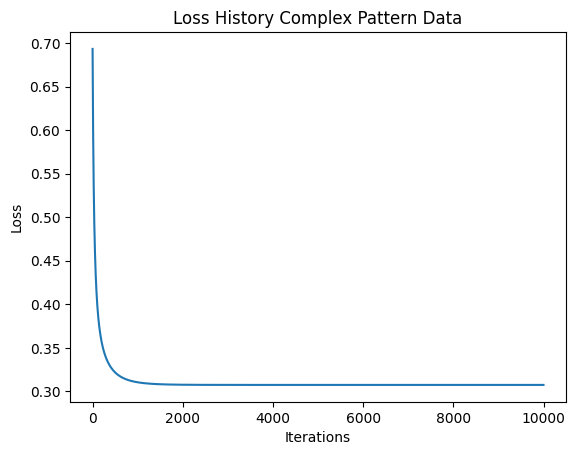

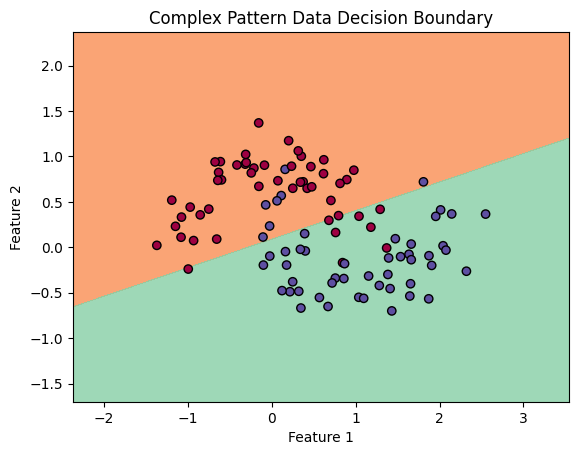

In [28]:
print("Training Logistic Regression on Complex Pattern Data")
train_and_plot(X_complex, y_complex, title="Complex Pattern Data")


### ปรับปรุงประสิทธิภาพของ Logistic Regression ได้โดยการเพิ่มฟีเจอร์เพิ่มเติม Polynomial Features

In [43]:
from sklearn.preprocessing import PolynomialFeatures

# เพิ่ม Polynomial Features (เช่น ระดับที่ 2) 
poly1 = PolynomialFeatures(degree=2, include_bias=False)
poly2 = PolynomialFeatures(degree=4, include_bias=False)
X_nonlinear_poly = poly1.fit_transform(X_nonlinear)
X_complex_poly = poly2.fit_transform(X_complex)


In [39]:
def plot_decision_boundary_with_poly(X, y, model_fn, poly, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # แปลง grid ด้วย Polynomial Features
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid)
    
    # ทำนายผลโดยใช้ฟังก์ชันโมเดลที่ส่งเข้ามา (lambda function)
    Z = model_fn(grid_poly)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



In [40]:
def train_with_poly(X, y, poly, learning_rate=0.1, iterations=10000, title=""):
    # แปลงข้อมูลด้วย Polynomial Features
    X_poly = poly.transform(X)
    
    # ฝึกแบบจำลอง
    weights, bias, loss_history = gradient_descent(X_poly, y, learning_rate, iterations)
    print("Weights:", weights)
    print("Bias:", bias)

    # การพล็อต Loss
    plt.plot(loss_history)
    plt.title(f"Loss History {title}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    return weights, bias

Iteration 0: Loss = 0.6931471805599436
Iteration 1000: Loss = 0.22494525206005742
Iteration 2000: Loss = 0.14738010845084415
Iteration 3000: Loss = 0.11566974930271798
Iteration 4000: Loss = 0.09811231328771398
Iteration 5000: Loss = 0.08680202382655336
Iteration 6000: Loss = 0.07882162004203705
Iteration 7000: Loss = 0.07283788491281479
Iteration 8000: Loss = 0.0681522012370579
Iteration 9000: Loss = 0.06436172963823825
Weights: [[  0.29359919]
 [  0.36995379]
 [-10.86104239]
 [ -0.26797945]
 [-10.91608672]]
Bias: 6.8313483211522135


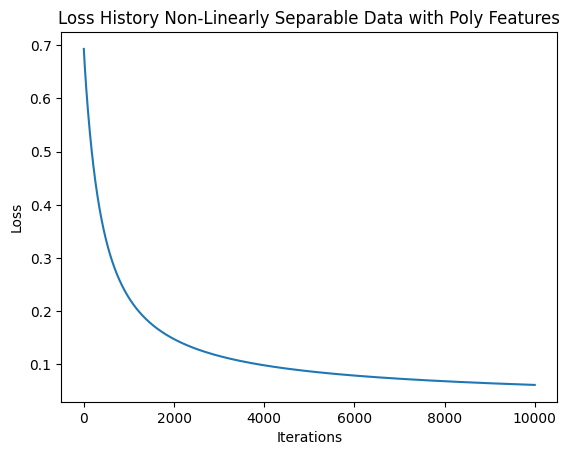

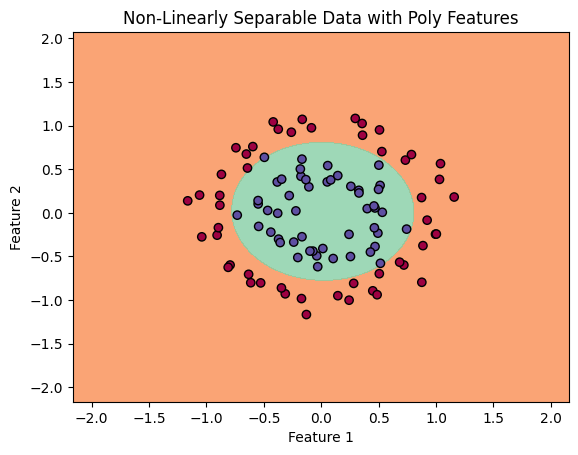

In [46]:
weights, bias = train_with_poly(X_nonlinear, y_nonlinear, poly1, title="Non-Linearly Separable Data with Poly Features")
# พล็อต Decision Boundary
plot_decision_boundary_with_poly(X_nonlinear, y_nonlinear, lambda x: sigmoid(np.dot(x, weights) + bias), poly1, title="Non-Linearly Separable Data with Poly Features")

Iteration 0: Loss = 0.6931471805599436
Iteration 1000: Loss = 0.1988562312808028
Iteration 2000: Loss = 0.16107156799557693
Iteration 3000: Loss = 0.14272082359596167
Iteration 4000: Loss = 0.13154411790775897
Iteration 5000: Loss = 0.12386649519137946
Iteration 6000: Loss = 0.1181802781452773
Iteration 7000: Loss = 0.11374689178295397
Iteration 8000: Loss = 0.1101593820915916
Iteration 9000: Loss = 0.10717375590111396
Weights: [[-0.04456301]
 [-4.48724219]
 [-9.21198629]
 [-2.01633394]
 [ 0.09427497]
 [ 2.14398756]
 [-3.14741684]
 [ 1.80419836]
 [-1.68192047]
 [ 2.50589469]
 [ 0.55257213]
 [ 0.55971634]
 [ 0.59904772]
 [-0.588029  ]]
Bias: 3.270156156474573


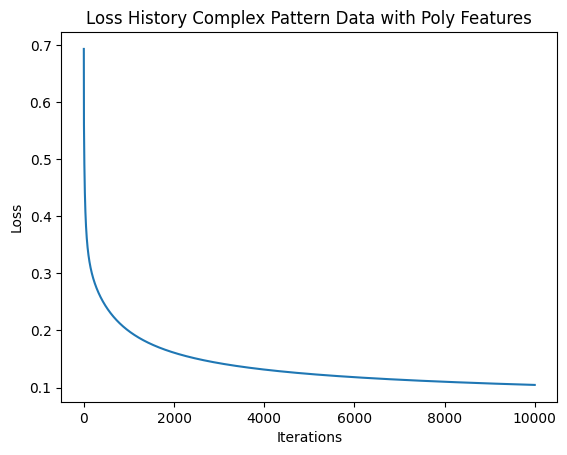

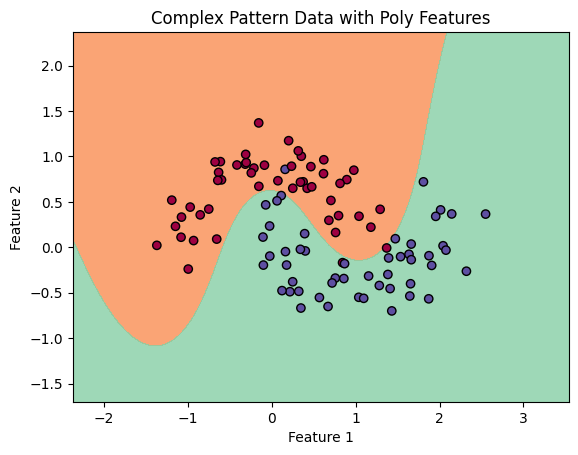

In [47]:
# การใช้แบบจำลองกับข้อมูล Complex Pattern Data
weights, bias = train_with_poly(X_complex, y_complex, poly2, title="Complex Pattern Data with Poly Features")

# พล็อต Decision Boundary
plot_decision_boundary_with_poly(X_complex, y_complex, lambda x: sigmoid(np.dot(x, weights) + bias), poly2, title="Complex Pattern Data with Poly Features")
